# Trump Tweets

An attempt at analyzing Trump's tweets

And to learn sentiment analysis :)

Sources

* [Tweet archive](https://www.thetrumparchive.com/)

# Dataset Cleaning

There is no real cleaning involved for now, but this may evolve.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_json("tweets.json")
df.columns = ['id', 'text', 'is_retweet', 'is_deleted', 'device',' favorites', 'retweets', 'date','is_flagged']

# EDA

In [16]:
def gen_calc(col,var, word):
    '''
    Calculates the percent of tweets that match the variable for that column
    '''
    answer = f"{round((len(df[df[col] == var]) / len(df)) * 100,2)}% of the President's tweets were {word}"
    return answer

In [17]:
gen_calc('is_retweet', 't', 'retweets')

"17.46% of the President's tweets were retweets"

In [18]:
gen_calc('is_deleted', 't', 'deleted')

"1.93% of the President's tweets were deleted"

In [19]:
gen_calc('is_flagged', 't', 'flagged')

"0.54% of the President's tweets were flagged"

In [29]:
max_retweets = max(df['retweets'])
df[df['retweets'] == max_retweets]['text'].reset_index(drop=True)[0]

'Tonight, @FLOTUS and I tested positive for COVID-19. We will begin our quarantine and recovery process immediately. We will get through this TOGETHER!'

In [46]:
i = 0
for x in df.sort_values('retweets', ascending = False).head(10)['date']:
    i += 1
    print(f"{i}. {x}")

1. 2020-10-02 04:54:06
2. 2017-07-02 13:21:42
3. 2016-11-08 11:43:14
4. 2014-06-04 10:23:11
5. 2020-06-02 02:02:10
6. 2019-08-02 17:41:30
7. 2017-11-12 00:48:01
8. 2013-08-31 09:46:07
9. 2020-05-31 16:23:43
10. 2020-05-31 22:52:42


Text(0.5, 1.0, "How many times have Trump's tweets been retweeted over time?")

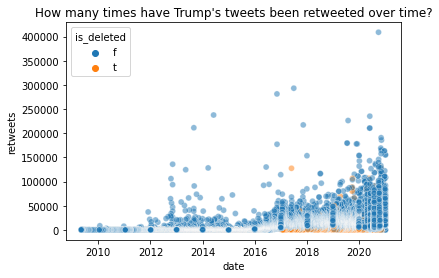

In [39]:
sns.scatterplot(x='date',y='retweets', data=df, alpha = 0.5, hue='is_deleted')
plt.title("How many times have Trump's tweets been retweeted over time?")

In [53]:
i = 0
top_ten = df.sort_values('retweets', ascending = False).head(10)[['text','date']].reset_index(drop=True)

In [58]:
for i, row in top_ten.iterrows():
    print(f"{row['date']}: {row['text']}")

2020-10-02 04:54:06: Tonight, @FLOTUS and I tested positive for COVID-19. We will begin our quarantine and recovery process immediately. We will get through this TOGETHER!
2017-07-02 13:21:42: #FraudNewsCNN #FNN https://t.co/WYUnHjjUjg
2016-11-08 11:43:14: TODAY WE MAKE AMERICA GREAT AGAIN!
2014-06-04 10:23:11: Are you allowed to impeach a president for gross incompetence?
2020-06-02 02:02:10: RT @SpaceX: Liftoff! https://t.co/DRBfdUM7JA
2019-08-02 17:41:30: A$AP Rocky released from prison and on his way home to the United States from Sweden. It was a Rocky Week, get home ASAP A$AP!
2017-11-12 00:48:01: Why would Kim Jong-un insult me by calling me ""old,"" when I would NEVER call him ""short and fat?"" Oh well, I try so hard to be his friend - and maybe someday that will happen!
2013-08-31 09:46:07: Be prepared, there is a small chance that our horrendous leadership could unknowingly lead us into World War III.
2020-05-31 16:23:43: The United States of America will be designating ANTI

In [62]:
df[df['device'].str.contains('iPhone')].sort_values('date')

,id,text,is_retweet,is_deleted,device,favorites,retweets,date,is_flagged
14410,278308122500661250,"Good luck to Bob Kraft, Tom Brady, and Coach B...",f,f,Twitter for iPhone,380,629,2012-12-11 01:20:01,f
24485,305671710382899200,"I'm saying that the Tea Party, perhaps by anot...",f,f,Twitter for iPhone,101,158,2013-02-24 13:33:09,f
24034,310818070610472960,"I'm at Trump Doral right now, Tiger will tee o...",f,f,Twitter for iPhone,122,75,2013-03-10 18:22:57,f
24033,310821024277078000,I will be live tweeting during the @Apprentice...,f,f,Twitter for iPhone,34,51,2013-03-10 18:34:41,f
23427,318085997000806400,We have tremendous economic power over China i...,f,f,Twitter for iPhone,90,193,2013-03-30 19:43:06,f
...,...,...,...,...,...,...,...,...,...
300,1346912780700577800,I am asking for everyone at the U.S. Capitol t...,f,f,Twitter for iPhone,730357,156100,2021-01-06 20:13:26,f
309,1346928882595885000,https://t.co/Pm2PKV0Fp3,f,f,Twitter for iPhone,0,0,2021-01-06 21:17:24,f
311,1346954970910707700,These are the things and events that happen wh...,f,f,Twitter for iPhone,0,0,2021-01-06 23:01:04,f
323,1347555316863553500,"The 75,000,000 great American Patriots who vot...",f,f,Twitter for iPhone,480997,108844,2021-01-08 14:46:38,f


In [63]:
df.shape

(56571, 9)

In [64]:
df.loc[300,'text']

'I am asking for everyone at the U.S. Capitol to remain peaceful. No violence! Remember, WE are the Party of Law &amp; Order – respect the Law and our great men and women in Blue. Thank you!'